In [14]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt

In [3]:
def problem_1(A):
    sing = la.svdvals(A)
    max_s = sing[0]
    min_s = sing[-1]
    if min_s==0:
        return np.inf
    else:
        return sing[0]/sing[-1]

In [58]:
A = np.random.random((6,6))
Q,R = la.qr(A)
print(problem_1(Q)-1.0<1e-5)
print(problem_1(A)-np.linalg.cond(A)<1e-5)

True
True


In [51]:
def problem_2():
    # Roots of w are 1,2,...,20
    w_roots = np.arange(1,21)
    
    # Get the polynomial coefficients
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    plt.scatter(w_roots.real,w_roots.imag,marker='o',color='blue')
    k_abs = 0
    k_rev = 0
    for i in range(100):
        # Perturb the coefficient slightly
        new_coeffs = w_coeffs*np.random.normal(1,1e-10,len(w_coeffs))
        new_roots = np.roots(np.poly1d(new_coeffs))
        h = w_coeffs-new_coeffs
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        plt.scatter(new_roots.real,new_roots.imag,marker=',',color='k',s=1)
        k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
        k_abs += k
        k_rev += k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
    plt.legend(['Original','Perturbed'])
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.axis([0,25,-6,6])
    plt.show()
    
    # Absolute and Relative condition numbers
    return k_abs/100, k_rev/100

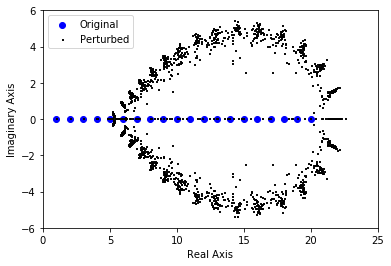

(3.65735262037767e-9, 2524260845.30208)


In [53]:
print(problem_2())

In [59]:
def problem_3(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    eigs_A = la.eigvals(A)
    eigs_AH = la.eigvals(A+H)
    k_abs = la.norm(eigs_A-eigs_AH)/la.norm(H,ord=2)
    k_rev = (la.norm(A,ord=2)/la.norm(eigs_A))*k_abs
    return k_abs,k_rev

In [62]:
print(problem_3(A)) #non-symmetric
print(problem_3(A+A.T)) #symmetric

(4029726657.031527, 3895491770.5908799)
(0.49702119278120743, 0.47287283335778241)


In [76]:
def problem_4(xmin,xmax,ymin,ymax,res):
    X = np.linspace(xmin,xmax,res)
    Y = np.linspace(ymin,ymax,res)
    Z = np.zeros((len(X),len(Y)))
    for i in range(len(X)): 
        for j in range(len(Y)): 
            Z[i,j] = problem_3(np.array([[1,X[i]],[Y[j],1]]))[1]
    plt.pcolormesh(X,Y,Z,cmap='gray_r')
    plt.colorbar()
    plt.show()

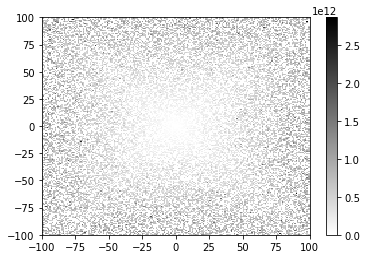

In [78]:
problem_4(-100,100,-100,100,200)

In [95]:
def problem_5(n):
    xk, yk = np.load('/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk4_DifIntOpt/stability_data.npy').T
    A = np.vander(xk,n+1)
    b = yk
    x_1 = la.inv(A.T@A)@A.T@b
    err_1 = la.norm(A@x_1-b)
    y_1 = np.polyval(x_1,xk)
    
    Q, R = np.linalg.qr(A,mode='reduced')
    x_2 = la.solve_triangular(R, Q.T@b)
    err_2 = la.norm(A@x_2-b)
    y_2 = np.polyval(x_2,xk)
    
    x = np.linspace(0,1,100)
    plt.plot(x,y_1,color='blue',label='Normal Equations')
    plt.plot(x,y_2,color='orange',label='QR Solver')
    plt.plot(xk,yk,marker='*',color='k',markersize='1',lw=0)
    plt.legend(loc='upper left')
    plt.axis([0,1,0,25])
    plt.show()
    
    return err_1, err_2

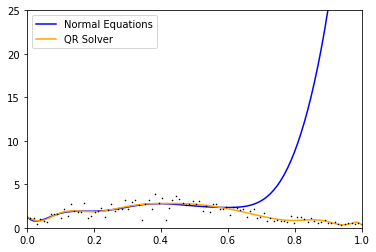

(152.14373083729365, 4.5683709383382585)


In [96]:
print(problem_5(14))

In [143]:
def integrate(x,n):
    return (x**n)*sy.exp(x-1)

def problem_6():
    err = np.zeros(10)
    for i in range(10):
        n = 5*(i+1)
        f = lambda x: integrate(x,n)
        x = sy.Symbol('x')
        I_1 = sy.integrate((x**n)*sy.exp(x-1), (x,0,1))
        I_2 = float(((-1)**n)*sy.subfactorial(n)+((-1)**(n+1))*(sy.factorial(n)/sy.exp(1)))
        err[i] = float(abs((I_2-I_1))/abs(I_1))
    print(err)
    x = np.linspace(5,50,10)
    plt.plot(x,err,marker='o',lw=0)
    plt.yscale('log')
    plt.show()

[  1.41635511e-14   6.00215780e-11   5.85455510e-05   2.30441810e+03
   8.53506428e+09   1.80724401e+17   5.76715154e+24   3.45585761e+32
   1.16529461e+41   4.23108737e+49]


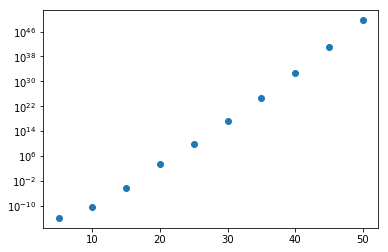

In [144]:
problem_6()

This is not a stable method for computing I(n).